In [31]:
!pip3 install -U ucimlrepo 

In [32]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [33]:
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [34]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [35]:
y


,quality
0,5
1,5
2,5
3,6
4,5
...,...
6492,6
6493,5
6494,6
6495,7


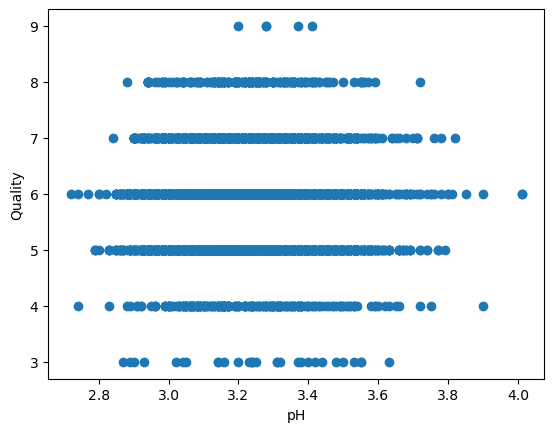

In [36]:
ph = X['pH']

plt.xlabel('pH')
plt.ylabel('Quality')
plt.scatter(ph, y)

Since it is a discrete relationship, we should ues classification model. I will use Random Forest here.

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)


rfc=RandomForestClassifier(n_estimators = 300, max_depth = 15, random_state = 0)
rfc.fit(X_train,y_train)

/Users/annieteng/miniforge3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=15, n_estimators=300, random_state=0)

In [45]:
y_pred=rfc.predict(X_test)
y_pred

array([6, 6, 6, ..., 5, 6, 6])

In [46]:
y_train.value_counts(normalize=True)

quality
6          0.437945
5          0.329036
7          0.166057
4          0.032519
8          0.029248
3          0.004618
9          0.000577
Name: proportion, dtype: float64

In [47]:
from sklearn.metrics import classification_report, accuracy_score

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
# Classification report for precision, recall, and F1-score
print(classification_report(y_test, y_pred))


Accuracy: 0.696923076923077
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.90      0.19      0.32        47
           5       0.74      0.71      0.73       428
           6       0.65      0.82      0.72       560
           7       0.78      0.54      0.64       216
           8       0.93      0.34      0.50        41
           9       0.00      0.00      0.00         2

    accuracy                           0.70      1300
   macro avg       0.57      0.37      0.41      1300
weighted avg       0.71      0.70      0.68      1300



/Users/annieteng/miniforge3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/annieteng/miniforge3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/annieteng/miniforge3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Feature importances

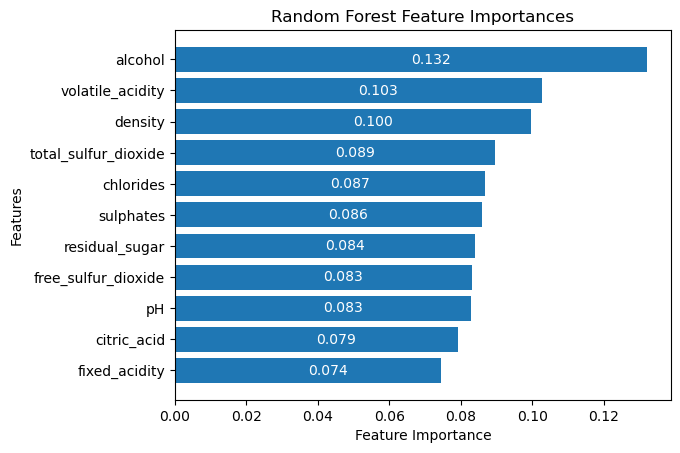

In [41]:
# Get feature importances from the fitted model
imp = rfc.feature_importances_
indices = np.argsort(imp)[::-1] # Sort the imp array in descending order

# Reorder the feature names into descending order
sorted_features = np.array(X.columns)[indices]
sorted_imp = imp[indices]

plt.barh(range(len(sorted_imp)), sorted_imp, align='center')

for i, v in enumerate(sorted_imp):
    plt.text(v/2, i, f"{v:.3f}", color = 'w', va = 'center')

plt.yticks(range(len(sorted_imp)), sorted_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importances')

plt.gca().invert_yaxis() 
plt.show()

If we predict the wine quality based on pH value alone, what will be the result?

In [42]:
from sklearn.metrics import classification_report, accuracy_score

X_ph = X[['pH']] 

X_train, X_test, y_train, y_test = train_test_split(X_ph, y, test_size=0.2, random_state=0)

rfc = RandomForestClassifier(n_estimators = 300, max_depth = 15, random_state = 0)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))



/Users/annieteng/miniforge3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.4330769230769231
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        48
           5       0.35      0.19      0.24       413
           6       0.45      0.83      0.59       579
           7       0.36      0.02      0.04       211
           8       0.00      0.00      0.00        41
           9       0.00      0.00      0.00         1

    accuracy                           0.43      1300
   macro avg       0.17      0.15      0.12      1300
weighted avg       0.37      0.43      0.35      1300



/Users/annieteng/miniforge3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/annieteng/miniforge3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/annieteng/miniforge3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)